<a href="https://colab.research.google.com/github/Satyanarayana53/FMML_Projects_and_labs/blob/main/FMML_M5Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



## SVMs Recap:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

In [6]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

(100, 2) (100,)


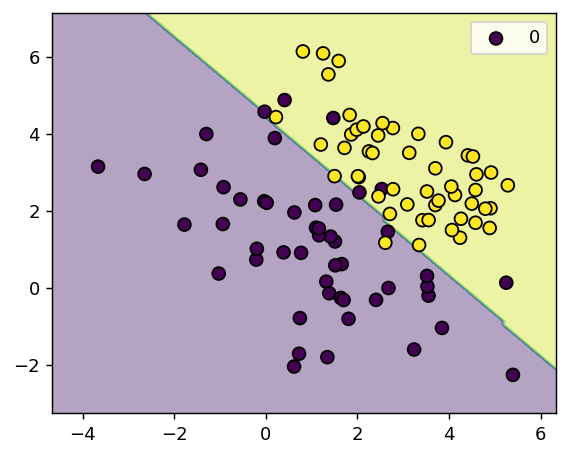

In [7]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


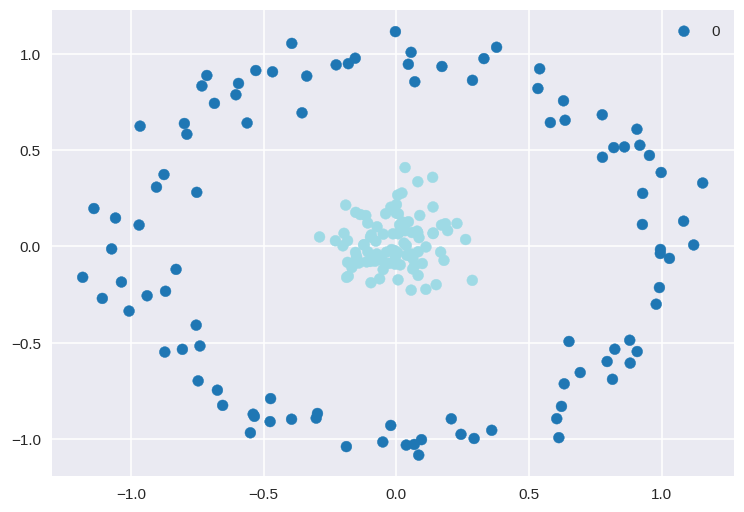

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

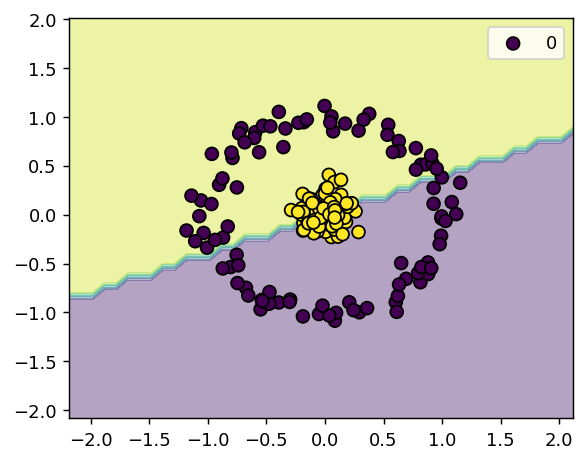

In [9]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [10]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [11]:
X_new = np.hstack((X, Z))

In [12]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

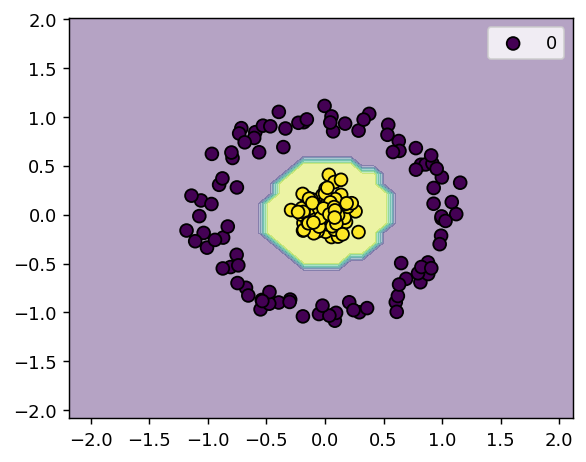

In [13]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [14]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.

**1. To run the same experiment after filtering different features, 2 at a time.**


In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import itertools

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Get feature names for clarity
feature_names = iris.feature_names

# List all combinations of 2 features
feature_combinations = list(itertools.combinations(range(X.shape[1]), 2))

# Iterate over each combination of 2 features
for combo in feature_combinations:
    # Select only the two features
    X_filtered = X[:, combo]

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, random_state=0)

    # Train SVM model
    clf = svm.SVC(kernel='poly')
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)

    # Print the result
    feature_names_combo = [feature_names[i] for i in combo]
    print(f"Features: {feature_names_combo}")
    print(f"Accuracy: {accuracy:.3f}\n")


Features: ['sepal length (cm)', 'sepal width (cm)']
Accuracy: 0.763

Features: ['sepal length (cm)', 'petal length (cm)']
Accuracy: 0.947

Features: ['sepal length (cm)', 'petal width (cm)']
Accuracy: 0.947

Features: ['sepal width (cm)', 'petal length (cm)']
Accuracy: 0.947

Features: ['sepal width (cm)', 'petal width (cm)']
Accuracy: 0.947

Features: ['petal length (cm)', 'petal width (cm)']
Accuracy: 0.974



**2. Using different kinds of kernels for the SVM and plot it for Iris dataset -**
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

In [16]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import plotly.graph_objects as go

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Standardize the data for better performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# List of kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = {}

# Train and evaluate SVMs with different kernels
for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy
    print(f"Accuracy using {kernel} kernel: {accuracy:.3f}")

# Precomputed kernel (requires a kernel matrix)
K_train = linear_kernel(X_train, X_train)
clf_precomputed = svm.SVC(kernel='precomputed')
clf_precomputed.fit(K_train, y_train)

K_test = linear_kernel(X_test, X_train)
y_pred_precomputed = clf_precomputed.predict(K_test)
accuracy_precomputed = accuracy_score(y_test, y_pred_precomputed)
accuracies['precomputed'] = accuracy_precomputed
print(f"Accuracy using precomputed kernel: {accuracy_precomputed:.3f}")

# Visualize the results in 3D using Plotly
X_new = X_train  # You can modify this to visualize the entire dataset
fig = go.Figure(data=[go.Scatter3d(
    x=X_new[:, 0],
    y=X_new[:, 1],
    z=X_new[:, 2],
    mode="markers",
    marker={
        "color": y_train,  # Coloring based on target variable
        "line": {"width": 4, "color": 'DarkSlateGrey'},
        "colorscale": "viridis"
    },
)])

fig.update_layout(title="3D Scatter Plot of Iris Dataset with SVM Kernels")
fig.show()


Accuracy using linear kernel: 0.974
Accuracy using poly kernel: 0.868
Accuracy using rbf kernel: 0.974
Accuracy using sigmoid kernel: 0.842
Accuracy using precomputed kernel: 0.974
